In [38]:
# %matplotlib notebook


In [161]:
#Import Required Dependencies

import pandas as pd
import numpy as np
import os
import scipy.stats as stats
import re
import matplotlib.pyplot as plt
import numpy as np 
from scipy.stats import linregress
from scipy import stats as st


In [162]:
# Importing updated csv file 

cleaned_df = pd.read_csv("cleaned_data_js_sc_rg.csv", encoding="ISO-8859-1")

cleaned_df.head(10)


,S. No.,Timestamp,GADE,Game,Platform,Hours,earnings,whyplay,League,streams,...,Degree,Birthplace,Residence,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.00437,Both Singleplayer and Multiplayer,Skyrim,"Console (PS, Xbox, ...)",15,I play for fun,having fun,Unranked,0,...,Bachelor (or equivalent),USA,USA,Singleplayer,Accept,1,23,5,USA,USA
1,2,42052.00680,Somewhat difficult,Other,PC,8,I play for fun,having fun,Unranked,2,...,Bachelor (or equivalent),USA,USA,Multiplayer,Accept,8,16,33,USA,USA
2,3,42052.03860,Both Singleplayer and Multiplayer,Other,PC,0,I play for fun,having fun,Unranked,0,...,Bachelor (or equivalent),Germany,Germany,Singleplayer,Accept,8,17,31,DEU,DEU
3,4,42052.06804,Both Singleplayer and Multiplayer,Other,PC,20,I play for fun,improving,Unranked,5,...,Bachelor (or equivalent),USA,USA,Multiplayer,Accept,0,17,11,USA,USA
4,5,42052.08948,Very difficult,Other,"Console (PS, Xbox, ...)",20,I play for fun,having fun,Unranked,1,...,High school diploma (or equivalent),USA,South Korea,Multiplayer,Accept,14,14,13,KOR,USA
5,6,42052.13119,Both Singleplayer and Multiplayer,Other,"Console (PS, Xbox, ...)",4,I play for fun,relaxing,Unranked,0,...,Bachelor (or equivalent),USA,USA,Multiplayer,Accept,1,17,13,USA,USA
6,7,42052.14622,Both Singleplayer and Multiplayer,Other,PC,30,I play for fun,relaxing,Unranked,8,...,High school diploma (or equivalent),USA,USA,Multiplayer,Accept,0,16,26,USA,USA
7,9,42052.19737,Very difficult,Other,"Console (PS, Xbox, ...)",2,I play for fun,winning,Unranked,0,...,Bachelor (or equivalent),USA,USA,Multiplayer,Accept,12,12,55,USA,USA
8,10,42052.22995,Somewhat difficult,World of Warcraft,PC,25,I play for fun,improving,Unranked,0,...,High school diploma (or equivalent),Finland,Finland,Multiplayer,Accept,10,13,26,FIN,FIN
9,11,42052.24204,Somewhat difficult,Other,PC,14,I play for fun,having fun,Unranked,0,...,High school diploma (or equivalent),USA,USA,Singleplayer,Accept,19,27,6,USA,USA


In [163]:
# Cleaning inputs which are more than 168 to get accurate data (Column = Hours)

cleaned_hours = cleaned_df[cleaned_df["Hours"]<168]

cleaned_hours.head()

cleaned_hours["Hours"].max()

160

In [164]:
# Cleaning inputs which are rewritten as Both Single player and Multiplayer (Column = whyplay)

cleaned_hours = cleaned_hours[cleaned_hours["whyplay"]!="Both Singleplayer and Multiplayer"]

cleaned_hours.head()

,S. No.,Timestamp,GADE,Game,Platform,Hours,earnings,whyplay,League,streams,...,Degree,Birthplace,Residence,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.00437,Both Singleplayer and Multiplayer,Skyrim,"Console (PS, Xbox, ...)",15,I play for fun,having fun,Unranked,0,...,Bachelor (or equivalent),USA,USA,Singleplayer,Accept,1,23,5,USA,USA
1,2,42052.00680,Somewhat difficult,Other,PC,8,I play for fun,having fun,Unranked,2,...,Bachelor (or equivalent),USA,USA,Multiplayer,Accept,8,16,33,USA,USA
2,3,42052.03860,Both Singleplayer and Multiplayer,Other,PC,0,I play for fun,having fun,Unranked,0,...,Bachelor (or equivalent),Germany,Germany,Singleplayer,Accept,8,17,31,DEU,DEU
3,4,42052.06804,Both Singleplayer and Multiplayer,Other,PC,20,I play for fun,improving,Unranked,5,...,Bachelor (or equivalent),USA,USA,Multiplayer,Accept,0,17,11,USA,USA
4,5,42052.08948,Very difficult,Other,"Console (PS, Xbox, ...)",20,I play for fun,having fun,Unranked,1,...,High school diploma (or equivalent),USA,South Korea,Multiplayer,Accept,14,14,13,KOR,USA


In [165]:
# Cleaning inputs which are rewritten as Both Single player and Multiplayer (Column = Degree)

cleaned_hours = cleaned_hours[cleaned_hours["Degree"]!="Both Singleplayer and Multiplayer"]

cleaned_hours.head()

,S. No.,Timestamp,GADE,Game,Platform,Hours,earnings,whyplay,League,streams,...,Degree,Birthplace,Residence,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.00437,Both Singleplayer and Multiplayer,Skyrim,"Console (PS, Xbox, ...)",15,I play for fun,having fun,Unranked,0,...,Bachelor (or equivalent),USA,USA,Singleplayer,Accept,1,23,5,USA,USA
1,2,42052.00680,Somewhat difficult,Other,PC,8,I play for fun,having fun,Unranked,2,...,Bachelor (or equivalent),USA,USA,Multiplayer,Accept,8,16,33,USA,USA
2,3,42052.03860,Both Singleplayer and Multiplayer,Other,PC,0,I play for fun,having fun,Unranked,0,...,Bachelor (or equivalent),Germany,Germany,Singleplayer,Accept,8,17,31,DEU,DEU
3,4,42052.06804,Both Singleplayer and Multiplayer,Other,PC,20,I play for fun,improving,Unranked,5,...,Bachelor (or equivalent),USA,USA,Multiplayer,Accept,0,17,11,USA,USA
4,5,42052.08948,Very difficult,Other,"Console (PS, Xbox, ...)",20,I play for fun,having fun,Unranked,1,...,High school diploma (or equivalent),USA,South Korea,Multiplayer,Accept,14,14,13,KOR,USA


In [166]:
# Cleaning inputs which are rewritten as Both Single player and Multiplayer (Column = Platform)

cleaned_hours = cleaned_hours[cleaned_hours["Platform"]!="Both Singleplayer and Multiplayer"]

cleaned_hours.head()

,S. No.,Timestamp,GADE,Game,Platform,Hours,earnings,whyplay,League,streams,...,Degree,Birthplace,Residence,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.00437,Both Singleplayer and Multiplayer,Skyrim,"Console (PS, Xbox, ...)",15,I play for fun,having fun,Unranked,0,...,Bachelor (or equivalent),USA,USA,Singleplayer,Accept,1,23,5,USA,USA
1,2,42052.00680,Somewhat difficult,Other,PC,8,I play for fun,having fun,Unranked,2,...,Bachelor (or equivalent),USA,USA,Multiplayer,Accept,8,16,33,USA,USA
2,3,42052.03860,Both Singleplayer and Multiplayer,Other,PC,0,I play for fun,having fun,Unranked,0,...,Bachelor (or equivalent),Germany,Germany,Singleplayer,Accept,8,17,31,DEU,DEU
3,4,42052.06804,Both Singleplayer and Multiplayer,Other,PC,20,I play for fun,improving,Unranked,5,...,Bachelor (or equivalent),USA,USA,Multiplayer,Accept,0,17,11,USA,USA
4,5,42052.08948,Very difficult,Other,"Console (PS, Xbox, ...)",20,I play for fun,having fun,Unranked,1,...,High school diploma (or equivalent),USA,South Korea,Multiplayer,Accept,14,14,13,KOR,USA


In [167]:
# Finding a counts of total gender distribution in the survey

cleaned_df["Gender"].value_counts()

Gender_Count_Input = cleaned_hours["Gender"].value_counts()

Gender_Count = pd.DataFrame(cleaned_hours["Gender"].value_counts())

Gender_Count = Gender_Count.rename(columns={"Gender" : "Gender", "Gender": "Count"})

Gender_Count
# labels_graph = Gender_Count["Count"]

# print(labels_graph)

,Count
Male,9564
Female,598
Other,38


In [168]:
# Creating values to plot a Pie chart for gender distribution

# labels = [cleaned_df["Gender"].unique()]

labels = ["Male", "Female", "Other"]

# sizes = [cleaned_df["Gender"].value_counts()]

# sizes = [Gender_Count["Count"]]

sizes = [10984, 653, 45]

colors = ["red", "yellow", "blue"]

explode = (0.2, 0.1, 0)

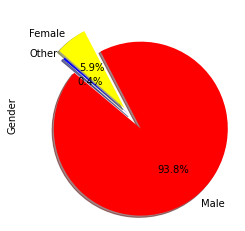

In [169]:
# Creating values to plot a Pie chart for gender distribution

Gender_Count_Chart = Gender_Count_Input.plot.pie(autopct="%1.1f%%", startangle=140, explode = explode, shadow = True, colors = colors)

explode = (0.2, 0.1, 0)

colors = ["red", "yellow", "blue"]
# plt.title("Gender Count")


In [170]:
# Creating data for avg hours of gaming per each gender drop down

# Hours_df = cleaned_df.groupby(["Hours"])
# Hours_df.head(10)

# Outlier = 8000

# New_df = cleaned_df[cleaned_df["Hours"].isin(Outlier) == False]
# New_df

Avg = cleaned_hours["Hours"].groupby(cleaned_hours["Gender"]).mean()
Avg_gender_input = pd.DataFrame(Avg)
Avg_gender_input


,Hours
Gender,
Female,19.135452
Male,21.415935
Other,30.842105


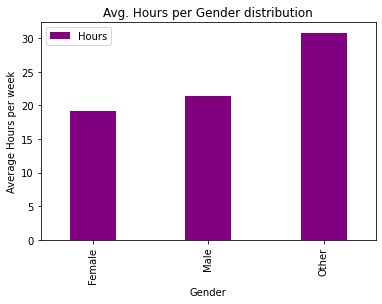

In [230]:
# Gender Distribution graph comparision. (Other seems to have a higher average in this analysis however only 50 inputs are collected while)\n 
# .. while inputs for male and female are 11,000 and 650 approx. 

Gender_distribution_chart = Avg_gender_input.plot.bar(color = 'purple', title = "Avg. Hours per Gender distribution", xlabel = "Gender", ylabel = "Average Hours per week", width = 0.4)

# Gender_distribution_chart, ax = plt.subplots()

# indexes = ["Female", "Male", "Other"]

# values = [18.95, 21.64, 30.44]
# values = Avg_gender_input["Hours"]
# bars = ax.barh(indexes, values)

# ax.bar_label(bars)


# for bars in ax.containers:
#    ax.bar_label(bars)
    


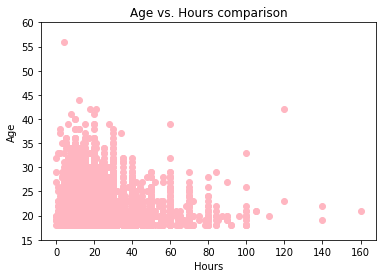

In [172]:
# Age vs. Hours Comparsion on a scatter plot. 

x_axis = cleaned_hours['Hours']
y_axis = cleaned_hours['Age']

plt.scatter(x_axis, y_axis, marker = 'o', color = 'lightpink')
plt.ylim(15,60)
plt.xlabel("Hours")
plt.ylabel("Age")
plt.title("Age vs. Hours comparison")
plt.show()



<AxesSubplot:title={'center':'Occupation vs. No. of Hours Comparison'}, xlabel='Occupation', ylabel='Hours per Week'>

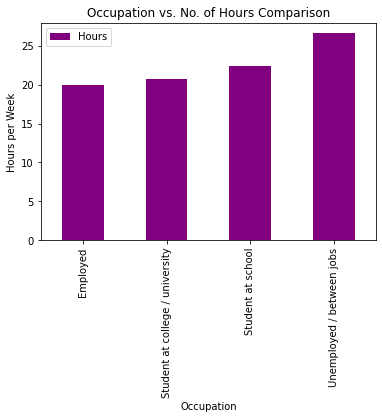

In [231]:
# Work vs Hours Comparsion on a bar plot. 

WvH = cleaned_hours["Hours"].groupby(cleaned_hours["Work"]).mean()

WvH_input = pd.DataFrame(WvH)

WvH_input.plot.bar(color = 'purple',width = 0.5, title = "Occupation vs. No. of Hours Comparison", xlabel = "Occupation", ylabel = "Hours per Week")

In [174]:
# zz = cleaned_hours['Hours'].plot.scatter()

having fun                  4114
improving                   3728
winning                     1602
relaxing                     530
other                        133
having fun and improving      48
having fun and winning        21
improving and winning         17
having fun and relaxing        4
improving and relaxing         3
Name: whyplay, dtype: int64

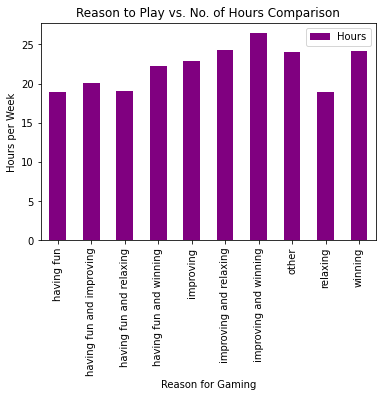

In [238]:
# Whyplay vs Hours Comparsion on a bar plot. 

# cleaned_hours[""]

WhyPlayVsHours = cleaned_hours["Hours"].groupby(cleaned_hours["whyplay"]).mean()

WhyPlayVsHours_input = pd.DataFrame(WhyPlayVsHours)

WhyPlayVsHours_input.plot.bar(color = 'purple',width = 0.5, title = "Reason to Play vs. No. of Hours Comparison", xlabel = "Reason for Gaming", ylabel = "Hours per Week")

cleaned_hours["whyplay"].value_counts()



In [244]:
# ANOVA test for all Whyplay and GAD_T values

group1 = cleaned_hours[cleaned_hours['whyplay'] == "having fun"]['GAD_T']
group2 = cleaned_hours[cleaned_hours['whyplay'] == "improving"]['GAD_T']
group3 = cleaned_hours[cleaned_hours['whyplay'] == "relaxing"]['GAD_T']
group4 = cleaned_hours[cleaned_hours['whyplay'] == "other"]['GAD_T']
group5 = cleaned_hours[cleaned_hours['whyplay'] == "improving and relaxing"]['GAD_T']
group6 = cleaned_hours[cleaned_hours['whyplay'] == "having fun and relaxing"]['GAD_T']
group7 = cleaned_hours[cleaned_hours['whyplay'] == "having fun and improving"]['GAD_T']
group8 = cleaned_hours[cleaned_hours['whyplay'] == "winning"]['GAD_T']
group9 = cleaned_hours[cleaned_hours['whyplay'] == "having fun and winning"]['GAD_T']
group10 = cleaned_hours[cleaned_hours['whyplay'] == "improving and winning"]['GAD_T']


st.f_oneway(group1, group2, group3, group4, group5, group6, group7, group8, group9, group10)


F_onewayResult(statistic=19.235548589103374, pvalue=2.6976246411633364e-32)

In [245]:
# ANOVA test for all Whyplay and SPIN_T values

group1 = cleaned_hours[cleaned_hours['whyplay'] == "having fun"]['SWL_T']
group2 = cleaned_hours[cleaned_hours['whyplay'] == "improving"]['SWL_T']
group3 = cleaned_hours[cleaned_hours['whyplay'] == "relaxing"]['SWL_T']
group4 = cleaned_hours[cleaned_hours['whyplay'] == "other"]['SWL_T']
group5 = cleaned_hours[cleaned_hours['whyplay'] == "improving and relaxing"]['SWL_T']
group6 = cleaned_hours[cleaned_hours['whyplay'] == "having fun and relaxing"]['SWL_T']
group7 = cleaned_hours[cleaned_hours['whyplay'] == "having fun and improving"]['SWL_T']
group8 = cleaned_hours[cleaned_hours['whyplay'] == "winning"]['SWL_T']
group9 = cleaned_hours[cleaned_hours['whyplay'] == "having fun and winning"]['SWL_T']
group10 = cleaned_hours[cleaned_hours['whyplay'] == "improving and winning"]['SWL_T']


st.f_oneway(group1, group2, group3, group4, group5, group6, group7, group8, group9, group10)


F_onewayResult(statistic=15.854716141605042, pvalue=4.486208002292872e-26)

In [246]:
# ANOVA test for all Whyplay and SPIN_T values

group1 = cleaned_hours[cleaned_hours['whyplay'] == "having fun"]['SPIN_T']
group2 = cleaned_hours[cleaned_hours['whyplay'] == "improving"]['SPIN_T']
group3 = cleaned_hours[cleaned_hours['whyplay'] == "relaxing"]['SPIN_T']
group4 = cleaned_hours[cleaned_hours['whyplay'] == "other"]['SPIN_T']
group5 = cleaned_hours[cleaned_hours['whyplay'] == "improving and relaxing"]['SPIN_T']
group6 = cleaned_hours[cleaned_hours['whyplay'] == "having fun and relaxing"]['SPIN_T']
group7 = cleaned_hours[cleaned_hours['whyplay'] == "having fun and improving"]['SPIN_T']
group8 = cleaned_hours[cleaned_hours['whyplay'] == "winning"]['SPIN_T']
group9 = cleaned_hours[cleaned_hours['whyplay'] == "having fun and winning"]['SPIN_T']
group10 = cleaned_hours[cleaned_hours['whyplay'] == "improving and winning"]['SPIN_T']


st.f_oneway(group1, group2, group3, group4, group5, group6, group7, group8, group9, group10)


F_onewayResult(statistic=6.865557537949544, pvalue=6.512746496457285e-10)

In [262]:
whyplay_groups = ["having fun", "improving", "relaxing", "winning", "other", "improving and relaxing", "having fun and relaxing", "having fun and improving", "having fun and winning", "improving and winning"]

whyplay_GAD_df = cleaned_hours.groupby(['whyplay']).agg(['mean']).loc[whyplay_groups]['GAD_T']

whyplay_SWL_df = cleaned_hours.groupby(['whyplay']).agg(['mean']).loc[whyplay_groups]['SWL_T']

whyplay_SPIN_df = cleaned_hours.groupby(['whyplay']).agg(['mean']).loc[whyplay_groups]['SPIN_T']

whyplay_psych_values = pd.DataFrame()
whyplay_psych_values["whyplay_labels"] = whyplay_groups
whyplay_psych_values["GAD_T_mean"] = whyplay_GAD_df["mean"].values
whyplay_psych_values["SWL_T_mean"] = whyplay_SWL_df["mean"].values
whyplay_psych_values["SPIN_T_mean"] = whyplay_SPIN_df["mean"].values

                     
whyplay_psych_values

,whyplay_labels,GAD_T_mean,SWL_T_mean,SPIN_T_mean
0,having fun,4.863636,20.474720,19.375790
1,improving,5.460837,19.454936,19.525751
2,relaxing,6.513208,18.828302,20.471698
3,winning,6.330212,18.207241,22.088639
4,other,6.804511,18.015038,22.789474
5,improving and relaxing,6.333333,21.000000,16.333333
6,having fun and relaxing,4.500000,16.750000,19.500000
7,having fun and improving,4.104167,21.645833,16.770833
8,having fun and winning,3.047619,21.428571,19.238095
9,improving and winning,4.941176,19.235294,21.470588


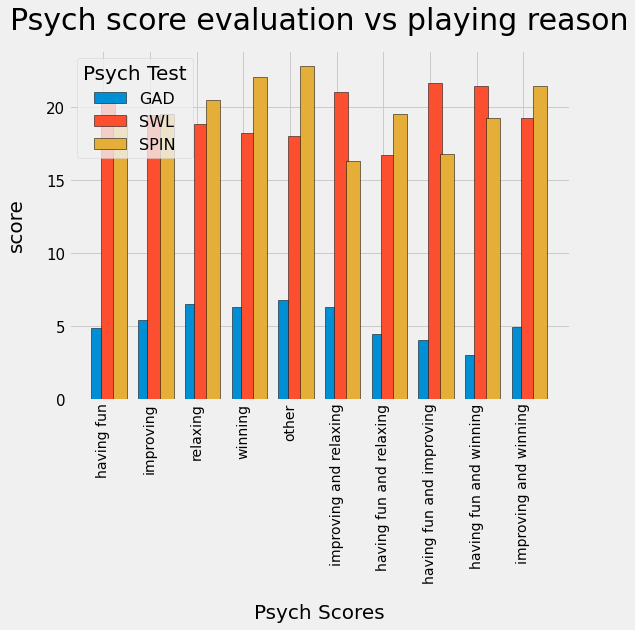

In [271]:
# GAD, SWL, SPIN vs Whyplay comparison 

#use fivethirty eights style of plots

plt.style.use("fivethirtyeight")

#create the base axis to add the bars to

fig, ax = plt.subplots(1,1, figsize = (8,6))

#extract the labels

label = whyplay_groups

#use this to create x ticks to add the data to

x = np.arange(len(label))

#set a width for each bar

width = 0.3

#create out first bar
#set it so that x will be the centre of the bars
#so that we can add our labels later
#so set the centre of the first to be 1/2 width away
#to the left

rect1 = ax.bar(x - width/3,
               
              whyplay_psych_values["GAD_T_mean"],
               
              width = width,
               label = "GAD",
               edgecolor = "black"
              )

#create the second bar
#with a centre half a width to the right

rect2 = ax.bar(x + width/3,
              whyplay_psych_values["SWL_T_mean"],
              width = width,
              label = "SWL",
              edgecolor = "black")
rect3 = ax.bar(x + 1.2*width,
              whyplay_psych_values["SPIN_T_mean"],
              width = width,
              label = "SPIN",
              edgecolor = "black")

#add the labels to the axis

ax.set_ylabel("score",
             fontsize = 20,
             labelpad = 20)

ax.set_xlabel("Psych Scores",
             fontsize = 20,
             labelpad =20)

ax.set_title("Psych score evaluation vs playing reason",
            fontsize = 30,
            pad = 20)

#set the ticks

ax.set_xticks(x)
ax.set_xticklabels(label)

#add the legend
#using the labels of the bars

ax.legend(title = "Psych Test",
         fontsize = 16,
         title_fontsize = 20)

#adjust the tick paramaters

ax.tick_params(axis = "x",
              which = "both",
              labelrotation = 90)

ax.tick_params(axis = "y",
              which = "both",
              labelsize = 15)



<AxesSubplot:title={'center':'Whyplay vs. Total GAD score comparison'}, xlabel='Whyplay', ylabel='Avg. GAD_T score'>

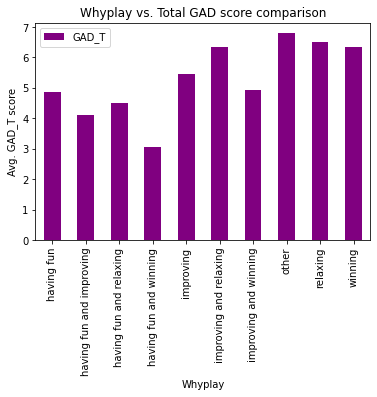

In [239]:
# Whyplay vs. Total GAD score comparison

WhyPlayVsGAD_T = cleaned_hours["GAD_T"].groupby(cleaned_hours["whyplay"]).mean()

WhyPlayVsGAD_T_input = pd.DataFrame(WhyPlayVsGAD_T)

WhyPlayVsGAD_T_input.plot.bar(color = 'purple',width = 0.5, title = "Whyplay vs. Total GAD score comparison", xlabel = "Whyplay", ylabel = "Avg. GAD_T score")




<AxesSubplot:title={'center':'Whyplay vs. Total SWL score comparison'}, xlabel='Whyplay', ylabel='Avg. SWL_T score'>

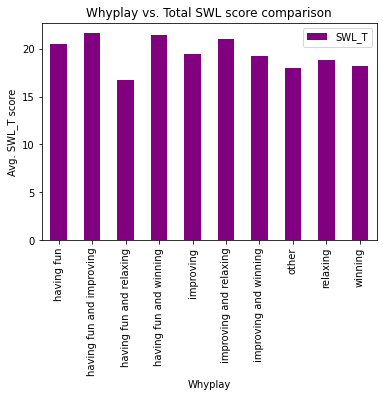

In [240]:
# Whyplay vs. Total SWL score comparison

WhyPlayVsSWL_T = cleaned_hours["SWL_T"].groupby(cleaned_hours["whyplay"]).mean()

WhyPlayVsSWL_T_input = pd.DataFrame(WhyPlayVsSWL_T)

WhyPlayVsSWL_T_input.plot.bar(color = 'purple',width = 0.5, title = "Whyplay vs. Total SWL score comparison", xlabel = "Whyplay", ylabel = "Avg. SWL_T score")



<AxesSubplot:title={'center':'Whyplay vs. Total SPIN score comparison'}, xlabel='Whyplay', ylabel='Avg. SPIN_T score'>

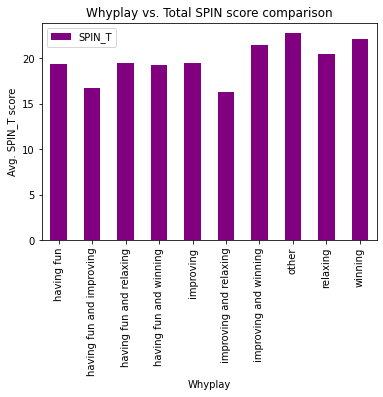

In [241]:
# Whyplay vs. Total SPIN score comparison

WhyPlayVsSPIN_T = cleaned_hours["SPIN_T"].groupby(cleaned_hours["whyplay"]).mean()

WhyPlayVsSPIN_T_input = pd.DataFrame(WhyPlayVsSPIN_T)

WhyPlayVsSPIN_T_input.plot.bar(color = 'purple',width = 0.5, title = "Whyplay vs. Total SPIN score comparison", xlabel = "Whyplay", ylabel = "Avg. SPIN_T score")



<AxesSubplot:title={'center':'Playstyle vs. No. of Hours Comparison'}, xlabel='Playstyle', ylabel='Hours per Week'>

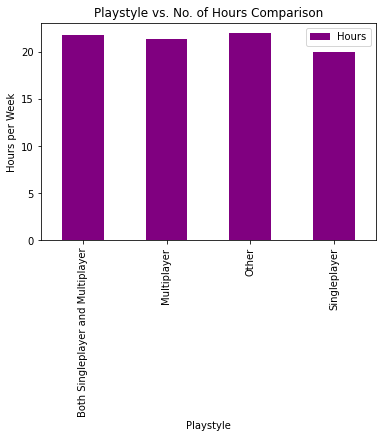

In [233]:
# Playstyle vs Hours Comparsion on a bar plot. 

PvH = cleaned_hours["Hours"].groupby(cleaned_hours["Playstyle"]).mean()

PvH_input = pd.DataFrame(PvH)

PvH_input.plot.bar(color = 'purple',width = 0.5, title = "Playstyle vs. No. of Hours Comparison", xlabel = "Playstyle", ylabel = "Hours per Week")

<AxesSubplot:title={'center':"Gamer's League vs. No. of Hours Comparison"}, xlabel='Playstyle', ylabel='Hours per Week'>

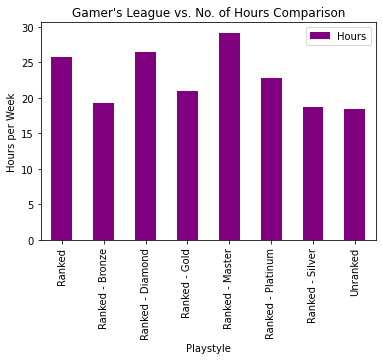

In [235]:
# League vs Hours Comparsion on a bar plot. 

LvH = cleaned_hours["Hours"].groupby(cleaned_hours["League"]).mean()

LvH_input = pd.DataFrame(LvH)

LvH_input.plot.bar(color = 'purple',width = 0.5, title = "Gamer's League vs. No. of Hours Comparison", xlabel = "Playstyle", ylabel = "Hours per Week")


<AxesSubplot:title={'center':"Gamer's Platform vs. No. of Hours Comparison"}, xlabel='Platform', ylabel='Hours per Week'>

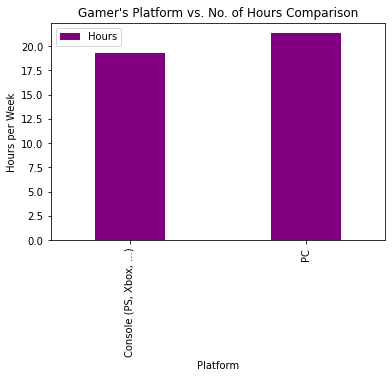

In [236]:
# Platform vs Hours Comparsion on a bar plot

PlatformVsHours = cleaned_hours["Hours"].groupby(cleaned_hours["Platform"]).mean()

PlatformVsHours_input = pd.DataFrame(PlatformVsHours)

PlatformVsHours_input.plot.bar(color = 'purple',width = 0.4, title = "Gamer's Platform vs. No. of Hours Comparison", xlabel = "Platform", ylabel = "Hours per Week")


<AxesSubplot:title={'center':"Gamer's Education vs. No. of Hours Comparison"}, xlabel='Education', ylabel='Hours per Week'>

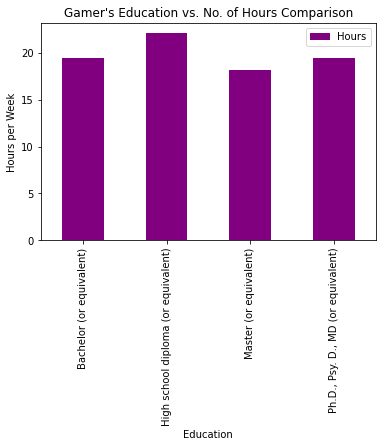

In [237]:
# Degree vs Hours Comparsion on a bar plot

DvH = cleaned_hours["Hours"].groupby(cleaned_hours["Degree"]).mean()

DvH_input = pd.DataFrame(DvH)

DvH_input.plot.bar(color = 'purple',width = 0.5, title = "Gamer's Education vs. No. of Hours Comparison", xlabel = "Education", ylabel = "Hours per Week")






In [151]:
# Gender vs League representation -- creating new dataframes for each gender type

female_df = cleaned_hours.loc[cleaned_hours['Gender']=='Female']
male_df = cleaned_hours.loc[cleaned_hours["Gender"] == "Male"]
other_df = cleaned_hours.loc[cleaned_hours["Gender"] == "Other"]



Unranked             251
Ranked - Silver      119
Ranked - Gold        107
Ranked - Platinum     44
Ranked - Bronze       32
Ranked - Diamond      23
Ranked                18
Ranked - Master        4
Name: League, dtype: int64

League
Ranked               22.111111
Ranked - Bronze      18.093750
Ranked - Diamond     28.739130
Ranked - Gold        20.822430
Ranked - Master      54.500000
Ranked - Platinum    28.477273
Ranked - Silver      17.176471
Unranked             16.183267
Name: Hours, dtype: float64

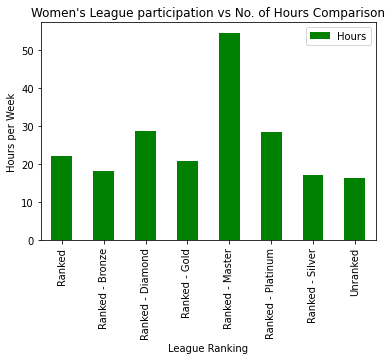

In [225]:
# Female League participation vs No. of Hours representation 

FLvH = female_df["Hours"].groupby(female_df["League"]).mean()

FLvH_input = pd.DataFrame(FLvH)

FLvH_input.plot.bar(color = 'g', width = 0.5, title = "Women's League participation vs No. of Hours Comparison", xlabel = "League Ranking", ylabel = "Hours per Week")

FLvH


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

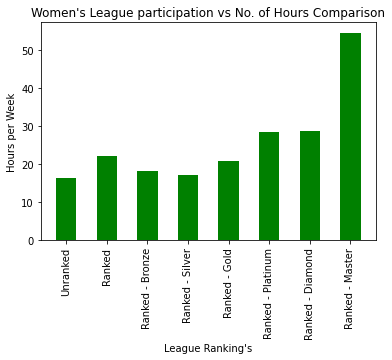

In [224]:
# Female League participation vs No. of Hours representation ( in order)

FLvH_df = pd.DataFrame(
   dict(
      League = ["Unranked", "Ranked", "Ranked - Bronze", "Ranked - Silver", "Ranked - Gold", "Ranked - Platinum", "Ranked - Diamond", "Ranked - Master"],
      Avg_Hours_F = [16.183267, 22.111111, 18.093750, 17.176471, 20.822430, 28.477273, 28.739130, 54.500000]
   )
)


plt.bar('League', 'Avg_Hours_F', data = FLvH_df, color ='green', width = 0.5)
plt.title("Women's League participation vs No. of Hours Comparison") 
plt.xlabel("League Ranking's") 
plt.ylabel("Hours per Week")
plt.xticks(rotation=90)


League
Ranked               25.731518
Ranked - Bronze      19.196721
Ranked - Diamond     26.377921
Ranked - Gold        20.950547
Ranked - Master      28.513158
Ranked - Platinum    22.733850
Ranked - Silver      18.748439
Unranked             18.665701
Name: Hours, dtype: float64

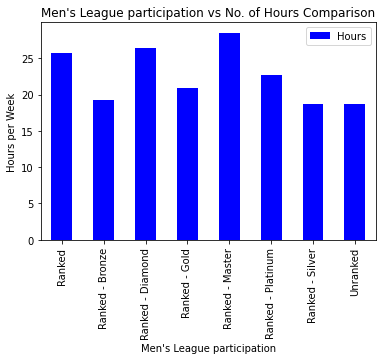

In [219]:
# Male League participation vs No. of Hours representation 

MLvH = male_df["Hours"].groupby(male_df["League"]).mean()

MLvH_input = pd.DataFrame(MLvH)

MLvH_input.plot.bar(color = 'b', width = 0.5, title = "Men's League participation vs No. of Hours Comparison", xlabel = "Men's League participation", ylabel = "Hours per Week")

MLvH 

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

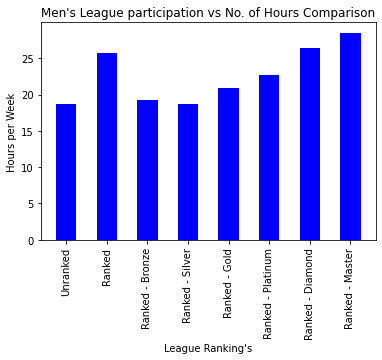

In [218]:
# Male League participation vs No. of Hours representation (in order)

MLvH_df = pd.DataFrame(
   dict(
      League = ["Unranked", "Ranked", "Ranked - Bronze", "Ranked - Silver", "Ranked - Gold", "Ranked - Platinum", "Ranked - Diamond", "Ranked - Master"],
      Avg_Hours_M = [18.665701, 25.731518, 19.196721, 18.748439, 20.950547, 22.733850, 26.377921, 28.513158]
   )
)


plt.bar('League', 'Avg_Hours_M', data = MLvH_df, color ='blue', width = 0.5)
plt.title("Men's League participation vs No. of Hours Comparison") 
plt.xlabel("League Ranking's") 
plt.ylabel("Hours per Week")
plt.xticks(rotation=90)

Unranked             251
Ranked - Silver      119
Ranked - Gold        107
Ranked - Platinum     44
Ranked - Bronze       32
Ranked - Diamond      23
Ranked                18
Ranked - Master        4
Name: League, dtype: int64

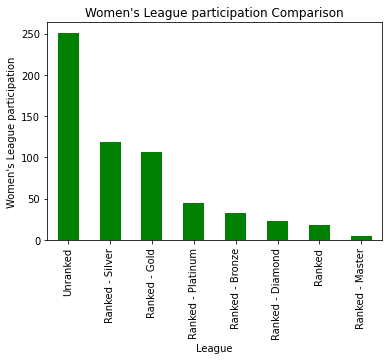

In [216]:
# Female Participants in Leagues

female_df["League"].value_counts().plot.bar(color='g', width = 0.5, title = "Women's League participation Comparison", 
xlabel = "League", ylabel = "Women's League participation")


# league_order = ["Unranked", "Ranked", "Ranked - Bronze", "Ranked - Silver", "Ranked - Gold", "Ranked - Platinum", "Ranked - Diamond", "Ranked - Master"]
# ax = df.set_index(league column).loc[league_order].plot.bar(color='g', width = 0.4, title = "Women's League participation Comparison", xlabel = "League", ylabel = "Women's League participation")

female_df["League"].value_counts()


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

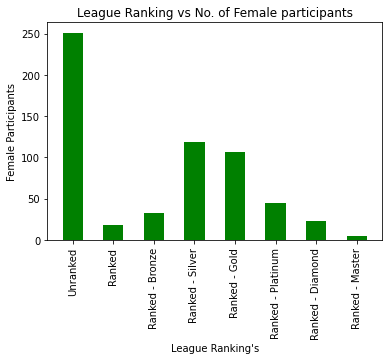

In [215]:
# Female Participants in Leagues (in order)

female_order_df = pd.DataFrame(
   dict(
      League = ["Unranked", "Ranked", "Ranked - Bronze", "Ranked - Silver", "Ranked - Gold", "Ranked - Platinum", "Ranked - Diamond", "Ranked - Master"],
      Count_female = [251, 18, 32, 119, 107, 44, 23, 4]
   )
)


plt.bar('League', 'Count_female', data=female_order_df, color ='green', width = 0.5)
plt.title("League Ranking vs No. of Female participants") 
plt.xlabel("League Ranking's") 
plt.ylabel("Female Participants")
plt.xticks(rotation=90)

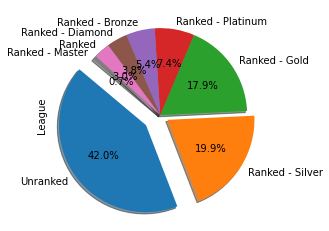

In [207]:
# Female Participants in Leagues (Pie Chart)
explode = (0.2, 0.1, 0, 0, 0, 0, 0, 0)


Female_League_Chart = female_df["League"].value_counts().plot.pie(autopct="%1.1f%%", explode = explode, startangle=140, shadow = True)


# explode = explode; colors = colors; colors = ["red", "yellow", "blue"]
# plt.title("Gender Count")


Ranked - Gold        2285
Ranked - Platinum    1935
Unranked             1726
Ranked - Silver      1602
Ranked - Diamond     1241
Ranked - Bronze       366
Ranked                257
Ranked - Master       152
Name: League, dtype: int64

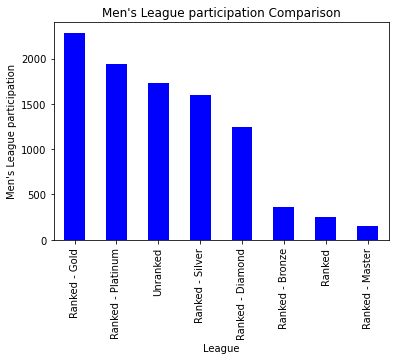

In [217]:
# Male Participants in Leagues

male_df["League"].value_counts().plot.bar(color='b', width = 0.5, title = "Men's League participation Comparison", xlabel = "League", ylabel = "Men's League participation")

male_df["League"].value_counts()

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

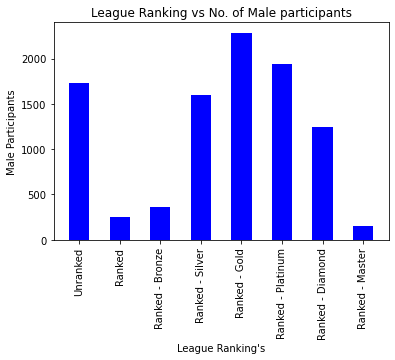

In [214]:
# Male Participants in Leagues (in order)

male_order_df = pd.DataFrame(
   dict(
      League = ["Unranked", "Ranked", "Ranked - Bronze", "Ranked - Silver", "Ranked - Gold", "Ranked - Platinum", "Ranked - Diamond", "Ranked - Master"],
      Count_male = [1726, 257, 366, 1602, 2285, 1935, 1241, 152]
   )
)


plt.bar('League', 'Count_male', data=male_order_df, color ='blue', width = 0.5)
plt.title("League Ranking vs No. of Male participants") 
plt.xlabel("League Ranking's") 
plt.ylabel("Male Participants")
plt.xticks(rotation=90)
